In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import arcsine, rdist, burr12, weibull_max, exponpow, rice, skewnorm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 12.0

In /usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

### Step 1:


In [2]:
data = pd.read_csv('data.csv')
data.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
157929,0.009,"['Huncho Jack', 'Travis Scott', 'Quavo']",0.866,140793,0.6480,1,7foypmc7KZyU716Yv63BPe,0.000000,1,0.0967,-3.675,1,Saint,65,2017-12-21,0.0543,150.058,0.0798,2017
70765,0.974,['David Lanz'],0.467,200827,0.0900,0,2BXdDjt3w3lzKUZnsbg8Qs,0.916000,9,0.0573,-20.992,1,Return To The Heart,41,1991-01-01,0.0652,92.284,0.1380,1991
132859,0.492,['Mighty Baby'],0.312,309040,0.5040,0,6raIv4GEH750Dyxa3JeItq,0.017600,7,0.0867,-13.991,1,I've Been Down So Long That It Looks Like Up t...,19,1969-01-01,0.0312,142.213,0.6320,1969
136827,0.694,['Fania All Stars'],0.732,290907,0.7410,0,1c3mvvXwjWobPodHLtILw2,0.861000,9,0.1380,-12.463,1,Allegria,35,1989-12-31,0.0452,90.528,0.9290,1989
161321,0.936,['Tennessee Ernie Ford'],0.403,140480,0.2220,0,10NqLbCOIc3BiFJ477AaqM,0.000023,1,0.1120,-9.339,1,Trouble In Mind,4,1956-03-05,0.0474,166.732,0.3240,1956
20540,0.995,['Ted Weems & His Orchestra'],0.710,201013,0.2200,0,0XYOh3EWZn83nhpgvydsF7,0.711000,2,0.1130,-13.624,1,Nine O'Clock Sal,0,1926-07-01,0.0472,101.329,0.4590,1926
5300,0.582,['Sweethearts of the Rodeo'],0.746,130560,0.3910,0,3PRoQSELdSTZLtD07a5sF6,0.000000,5,0.0910,-11.485,1,Jingle Bell Rock,14,1947,0.0398,131.385,0.8950,1947
63541,0.781,['June Christy'],0.485,92533,0.2670,0,1tmnBYNRkdLwVmXTQs7sow,0.000000,1,0.1090,-6.390,1,This Time The Dreams On Me - Mono,8,1955-05-02,0.0334,146.193,0.6120,1955
24662,0.936,"['Felix Mendelssohn', 'Jascha Heifetz', 'Charl...",0.194,421320,0.0714,0,13OCKaV16Lv0YAYjN4LsZR,0.336000,0,0.0952,-25.033,1,"Violin Concerto in E Minor, Op. 64: II. Andante",0,1946,0.0416,102.152,0.0430,1946
62976,0.957,['Mukesh'],0.472,297760,0.4730,0,0IDMA11hYb3xXcA8ZAIDK4,0.002940,6,0.2310,-10.204,1,Mehnat Humara Jeevan,0,1952-12-01,0.0514,107.757,0.7750,1952


In [3]:
len(data.columns)

19

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [5]:
data=data.convert_dtypes()

In [6]:
continuous=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'popularity', 'speechiness', 'tempo',
       'valence','year']
discrete=['explicit','key', 'mode', 'year']

In [7]:
subsample = ['acousticness', 'danceability', 'popularity']

In [8]:
df=data[subsample]
df=df[df['popularity']>0]

### Step 2:
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

In [9]:
n_bins=np.log10(df.shape[0])*5
n_bins_=1+3.32*np.log10(df.shape[0])
print ("number of columns for histogram:",n_bins.round(), n_bins_.round() )

number of columns for histogram: 26.0 18.0


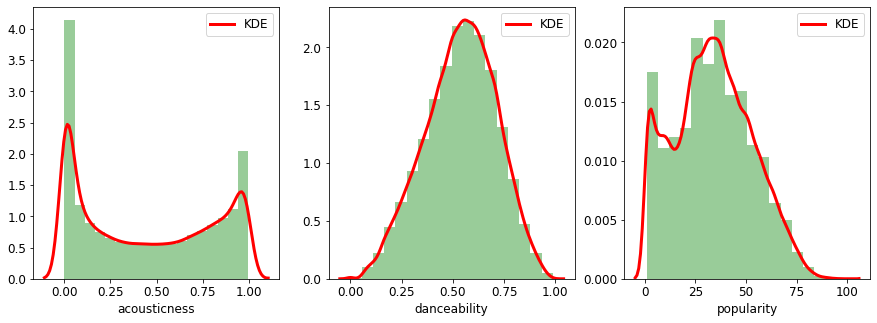

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5),squeeze=False)
axs=axs.flat
for num,col in enumerate(list(df.columns)):
    sns.distplot(df[col], kde=True,norm_hist=True,bins=18, ax=axs[num],
                 kde_kws={"color": "r", "lw": 3, "label": "KDE"},
                 hist_kws={"color": "g"})

### Step 3:
You need to make an estimation of order statistics and represent them as “box with whiskers” plot

In [11]:
stat = df.describe()[1:].round(decimals=1)
stat.T

,mean,std,min,25%,50%,75%,max
acousticness,0.4,0.4,0.0,0.1,0.4,0.8,1.0
danceability,0.5,0.2,0.0,0.4,0.5,0.7,1.0
popularity,33.6,19.0,1.0,20.0,33.0,47.0,100.0


In [12]:
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [13]:
for col in df.columns:
    conf=confidence_interval(df[col], confidence=0.95)
    print (f'For mean ({conf[0]}) confidence_interval is ({conf[1]}, {conf[2]}) ')

For mean (0.4457556546932217) confidence_interval is (0.44382277808539433, 0.4476885313010491) 
For mean (0.5375586085223696) confidence_interval is (0.5366289369002882, 0.5384882801444509) 
For mean (33.56689191213928) confidence_interval is (33.46500216816213, 33.66878165611644) 


In [14]:
def plot_hist_boxwisk(df):
    sns.set(style="whitegrid") 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df, ax=ax_box)
    sns.distplot(df, ax=ax_hist, bins=20) 
    # number of bins according to rule
#     ax_box.set(xlabel=col)
    plt.show()

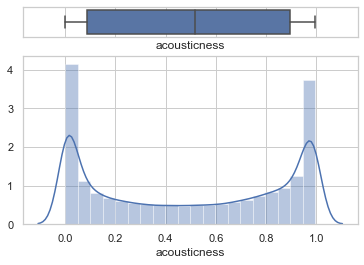

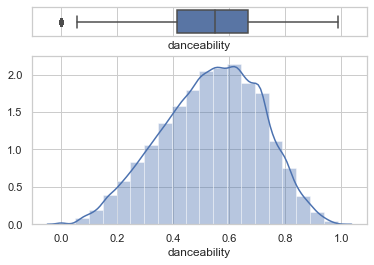

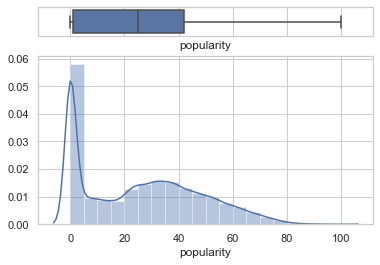

In [15]:
for col in subsample:
    plot_hist_boxwisk(data[col])

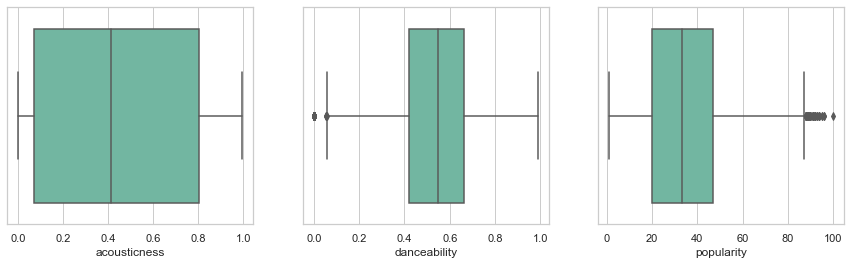

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4),squeeze=False)
axs=axs.flat
for num,col in enumerate(list(df.columns)):
    sns.boxplot(x = col, data = df, ax=axs[num], palette="Set2")

### Step 4: 
Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results 


##### Acousticness
1. The data are skewed a little
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but two suitable alternatives are the **arcsine distribution and rdist distribution**

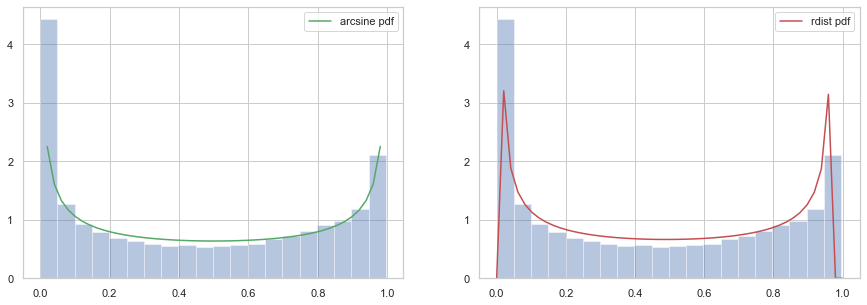

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
sns.distplot(df[['acousticness']],bins=20,kde=False,norm_hist=True, ax=axs[0])
sns.distplot(df[['acousticness']],bins=20,kde=False,norm_hist=True, ax=axs[1])
axs[0].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1)), color='g',label='arcsine pdf')
axs[0].legend(loc='best')
axs[1].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1), 1,0.49, 0.48), color='r',label='rdist pdf')
axs[1].legend(loc='best')
plt.show()

##### Danceability

1. The data are skewed a little
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **Burr (Type XII) distribution, weibull_max, exponpow **

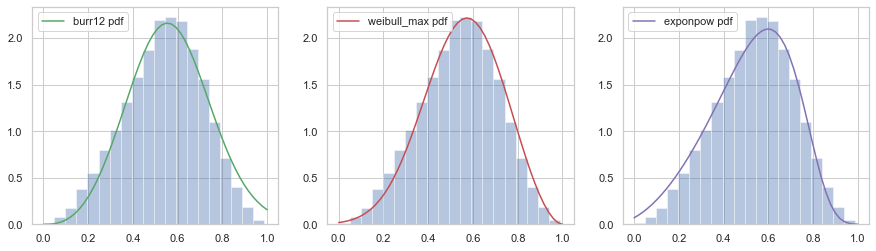

In [18]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs=axs.flat
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),3.7, 6.2), label='burr12 pdf', color = 'g')
axs[0].legend(loc='best')
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[1])
axs[1].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),2.8,1,0.5), label='weibull_max pdf', color = 'r')
axs[1].legend(loc='best')
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[2])
axs[2].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1), 2.9, -0.1, 0.8), label='exponpow pdf', color = 'm')
axs[2].legend(loc='best')
plt.show()

##### Popularity

1. The data are skewed a little
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **skewnorm, rice**.

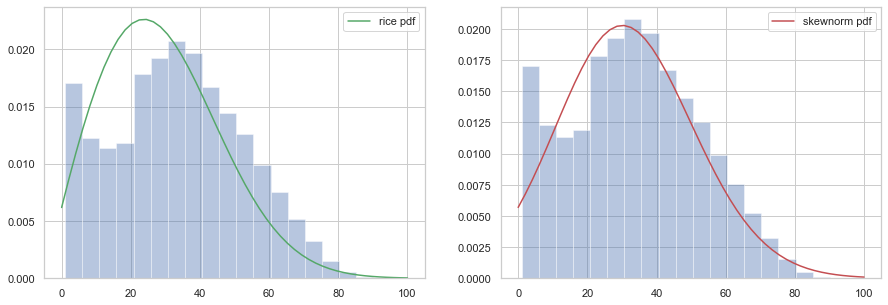

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
sns.distplot(df[['popularity']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 100), rice.pdf(np.linspace(0, 100), 1, -5, 22), label='rice pdf', color = 'g')
axs[0].legend(loc='best')
sns.distplot(df[['popularity']],bins=20,kde=False,norm_hist=True, ax=axs[1])
axs[1].plot(np.linspace(0, 100), skewnorm.pdf(np.linspace(0, 100), 1, 18, 24), label='skewnorm pdf', color = 'r')
axs[1].legend(loc='best')
plt.show()

In [20]:
def ks_test(data, distribution, params, alpha = 0.05, N = 50):
    ks = stats.kstest(data.sample(N), distribution, params, N)
    if ks[1] > alpha:
        print(f'Kolmogorov test passed. Under the null hypothesis,\n the two {distribution} distributions are identical')
    else:
        print(f"Kolmogorov test failed. Hypothesis about {distribution} is false")
    print(ks)
def cvm_test(data, distribution, params, alpha = 0.05):
    cvm = stats.cramervonmises(data.sample(50), distribution, params)
    if cvm.pvalue > alpha: 
        print(f"Cramer-von-Mises test passed. Hypothesis about that distribution \n have cumulative {distribution} distribution is true")
    else:
        print(f"Cramer-von-Mises failed. We reject the null hypothesis \n that the observed sample is drawn from a {distribution} distribution")
    print(cvm)
    print('\n')

In [21]:
def statistical_tests(data, distribution, params, alpha = 0.05, N = 50):
    ks_test(data, distribution, params, alpha, N = 50)
    print('\n')
    cvm_test(data, distribution, params, alpha)

In [22]:
#sampling from distribution with given parameters
def sample_dist(dist,params, size=1000):
    start = dist.ppf(0.001, *params)
    end = dist.ppf(0.099, *params)
    x = np.linspace(start, end, size)
    y = dist.rvs(*params, size)
#     x = np.reshape(x, (size))
#     y = np.reshape(y, (size))
    pdf = pd.Series(y, x)
    return pdf

In [23]:
#least squares method for parameters estimation
def l_s_m(function, data, a, b):
    x = np.linspace(a, b, 100)
    popt, pcov = optimize.curve_fit(function, xdata=x, ydata=np.percentile(data, x*100))
    return popt

In [24]:
#qns of sampled distributions with parameters(emp, mle,ls)
def qns(data, distr, params_distr_mle, params_distr_lsm):
    percs = np.linspace(0, 100, 100)
    qn_empir = np.percentile(data, percs)

    sample_mle = sample_dist(distr, params_distr_mle, size = data.shape[0])
    qn_mle = np.percentile(sample_mle, percs)

    sample_ls = sample_dist(distr, params_distr_lsm, size = data.shape[0])
    qn_ls = np.percentile(sample_ls, percs)
    
    return qn_empir, qn_mle, qn_ls

In [25]:
def qq_plot(qn_first, qn_second, distribution, title = '', ax=axs):
    min_qn = np.min([qn_first.min(), qn_second.min()])
    max_qn = np.max([qn_first.max(), qn_second.max()])
    x = np.linspace(0, max_qn*1.05)
    ax.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
    ax.plot(x, x, color="k", ls="--")
    ax.set_xlim(0, np.max(x)) 
    ax.set_ylim(0, np.max(x))
    ax.set_xlabel(f'Empirical distribution')
    ax.set_ylabel(f'Theoretical ({distribution}) distribution')
    ax.set_title(title)
# qq biplots drowing for both types of parameters estimation    
def qq_biplots(qn_empir, qn_mle, qn_ls, distr, col_name):
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    axs=axs.flat
    qq_plot(qn_empir, qn_mle, distr, title = 'QQ_biplot for MLE for '+col_name, ax=axs[0])
    qq_plot(qn_empir, qn_ls, distr, title = 'QQ_biplot for LSM for '+col_name, ax=axs[1])
    plt.show()

In [26]:
def parameters(data, distr, func_, a,b):
    parameters_mle = distr.fit(data)
    parameters_lsm = l_s_m(func_, data, a,b)
    return parameters_mle, parameters_lsm

In [27]:
def func_arcsine(x,loc, scale):
    return (arcsine.ppf(x,loc, scale))

In [28]:
def func_rdist(x,c, loc, scale):
    return (rdist.ppf(x,c,loc, scale))

In [29]:
def func_burr12(x,c,d, loc, scale):
    return (burr12.ppf(x,c, d, loc, scale))

In [30]:
def func_weibull_max(x,c, loc, scale):
    return (weibull_max.ppf(x,c,  loc, scale))

In [31]:
def func_exponpow(x,b,loc, scale):
    return (exponpow.ppf(x, b,loc, scale))

In [32]:
def func_rice(x,b,loc, scale):
    return (rice.ppf(x,b,loc, scale))

In [33]:
def func_skewnorm(x,a,loc, scale):
    return (skewnorm.ppf(x,a,loc, scale))

### Step 5.
Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.
### Step 6. 
Validate your estimated parameters using QQ biplots.
### Step 7.
Estimate correctness of fitted distributions using at least 2 statistical tests.

### Acousticness
1. The data are skewed a little, and more dense to edges
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but two suitable alternatives are the **arcsine distribution and rdist distribution**.

#### Arcsine distribution for Acousticness

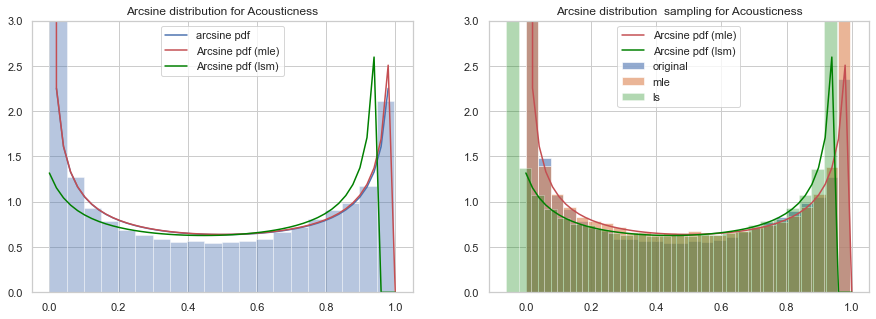

<Figure size 432x288 with 0 Axes>

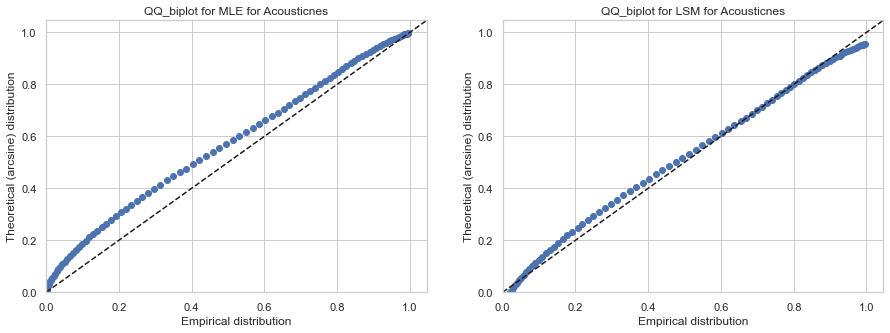

Kolmogorov test passed. Under the null hypothesis,
 the two arcsine distributions are identical
KstestResult(statistic=0.1372972300273973, pvalue=0.27645515265197584)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative arcsine distribution is true
CramerVonMisesResult(statistic=0.11048643066071673, pvalue=0.5375164337120357)


Kolmogorov test passed. Under the null hypothesis,
 the two arcsine distributions are identical
KstestResult(statistic=0.1580259642036643, pvalue=0.1476161933864153)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative arcsine distribution is true
CramerVonMisesResult(statistic=0.18848668953347136, pvalue=0.2914939927259077)




In [34]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
sns.distplot(df[['acousticness']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1)), label='arcsine pdf', color = 'b')
parameters_mle, parameters_lsm = parameters(df['acousticness'], arcsine, func_arcsine,0,1)
axs[0].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='Arcsine pdf (mle)')
axs[0].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='Arcsine pdf (lsm)')
axs[0].set_title('Arcsine distribution for Acousticness')
axs[0].legend(loc='best')
axs[0].set_ylim(0,3)
axs[1].hist(df[['acousticness']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(arcsine,parameters_mle, df['acousticness'].shape[0])
sample_ls = sample_dist(arcsine,parameters_lsm, df['acousticness'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='Arcsine pdf (mle)')
axs[1].plot(np.linspace(0, 1), arcsine.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='Arcsine pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_ylim(0,3)
axs[1].set_title('Arcsine distribution  sampling for Acousticness')
plt.show()
plt.savefig(fname='Acousticness.png', format='png', trainparent=False)
qq_biplots(*qns(df[['acousticness']], arcsine, parameters_mle, parameters_lsm), 'arcsine', 'Acousticnes')
# plt.savefig(fname='QQ_Acousticness.png', format='png', trainparent=False, dpi=500)
statistical_tests(df['acousticness'], 'arcsine', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['acousticness'], 'arcsine', parameters_lsm, alpha = 0.05, N = 50)

#### Rdist distribution for Acousticness

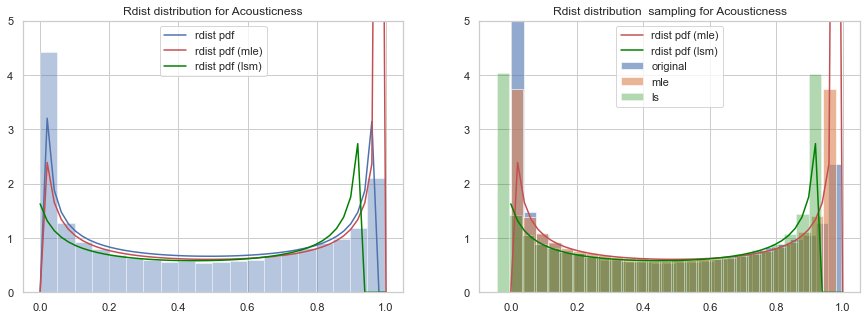

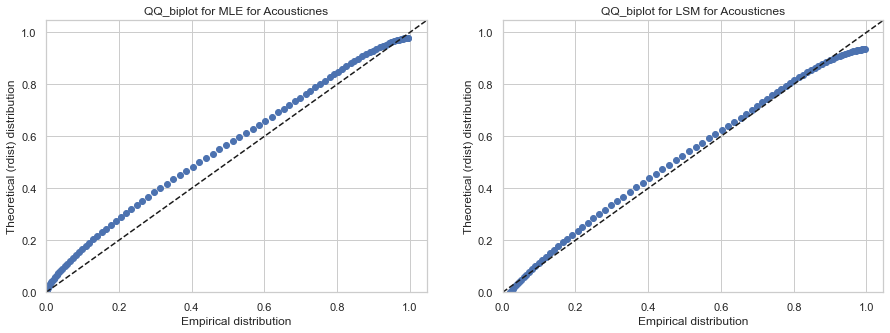

Kolmogorov test passed. Under the null hypothesis,
 the two rdist distributions are identical
KstestResult(statistic=0.11999996356502718, pvalue=0.43376834474267767)


Cramer-von-Mises failed. We reject the null hypothesis 
 that the observed sample is drawn from a rdist distribution
CramerVonMisesResult(statistic=0.5802318363762101, pvalue=0.024643039397690303)


Kolmogorov test passed. Under the null hypothesis,
 the two rdist distributions are identical
KstestResult(statistic=0.16092217882644408, pvalue=0.13425122363409803)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative rdist distribution is true
CramerVonMisesResult(statistic=0.43322303126164363, pvalue=0.0587208046613672)




In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
sns.distplot(df[['acousticness']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1), 1,0.49, 0.48), label='rdist pdf', color = 'b')
# parameters_mle, parameters_lsm = parameters(df['acousticness'], rdist, func_rdist,scale=0.49)
parameters_mle = rdist.fit(df['acousticness'], loc=0.49, fscale=0.49)
parameters_lsm = l_s_m(func_rdist, df['acousticness'], 0, 1)
axs[0].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='rdist pdf (mle)')
axs[0].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='rdist pdf (lsm)')
axs[0].set_title('Rdist distribution for Acousticness')
axs[0].legend(loc='best')
axs[0].set_ylim(0,5)
axs[1].hist(df[['acousticness']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(rdist,parameters_mle, df['acousticness'].shape[0])
sample_ls = sample_dist(rdist,parameters_lsm, df['acousticness'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='rdist pdf (mle)')
axs[1].plot(np.linspace(0, 1), rdist.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='rdist pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_ylim(0,5)
axs[1].set_title('Rdist distribution  sampling for Acousticness')
plt.show()
qq_biplots(*qns(df['acousticness'], rdist, parameters_mle, parameters_lsm), 'rdist', 'Acousticnes')
statistical_tests(df['acousticness'], 'rdist', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['acousticness'], 'rdist', parameters_lsm, alpha = 0.05, N = 50)

### Danceability

1. The data are skewed a little
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **Burr (Type XII) distribution, weibull_max, exponpow **.

#### Burr12 distribution for Danceability

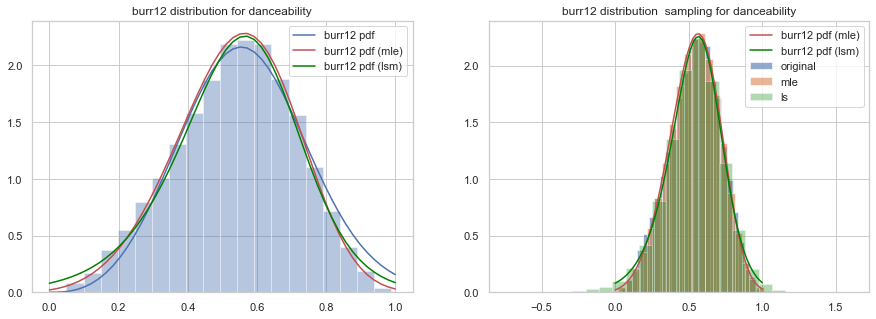

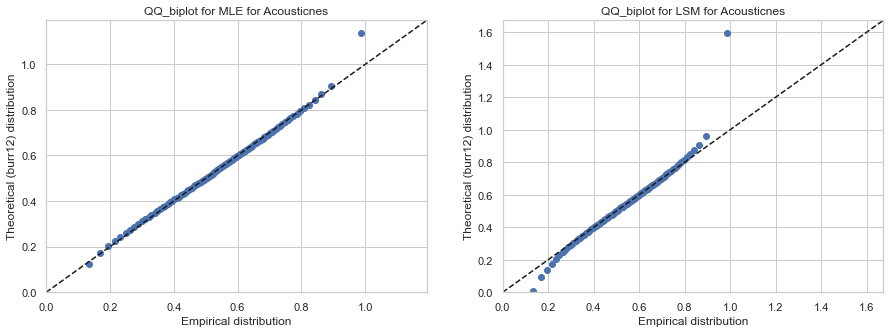

Kolmogorov test passed. Under the null hypothesis,
 the two burr12 distributions are identical
KstestResult(statistic=0.09272906117870189, pvalue=0.7482328385148675)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative burr12 distribution is true
CramerVonMisesResult(statistic=0.22079305209321182, pvalue=0.23084746433818293)


Kolmogorov test passed. Under the null hypothesis,
 the two burr12 distributions are identical
KstestResult(statistic=0.07713557560907114, pvalue=0.9049707958186857)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative burr12 distribution is true
CramerVonMisesResult(statistic=0.2620490462587652, pvalue=0.17365789731736814)




In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
c, d = 3.7, 6.2
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),c, d), label='burr12 pdf', color = 'b')
parameters_mle, parameters_lsm = parameters(df['danceability'], burr12, func_burr12, 0.2,0.6)
axs[0].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='burr12 pdf (mle)')
axs[0].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='burr12 pdf (lsm)')
axs[0].set_title('burr12 distribution for danceability')
axs[0].legend(loc='best')
axs[1].hist(df[['danceability']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(burr12,parameters_mle, df['danceability'].shape[0])
sample_ls = sample_dist(burr12,parameters_lsm, df['danceability'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='burr12 pdf (mle)')
axs[1].plot(np.linspace(0, 1), burr12.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='burr12 pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_title('burr12 distribution  sampling for danceability')
plt.show()

qq_biplots(*qns(df[['danceability']], burr12, parameters_mle, parameters_lsm), 'burr12', 'Acousticnes')
statistical_tests(df['danceability'], 'burr12', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['danceability'], 'burr12', parameters_lsm, alpha = 0.05, N = 50)

#### Weibull_max distribution for Danceability

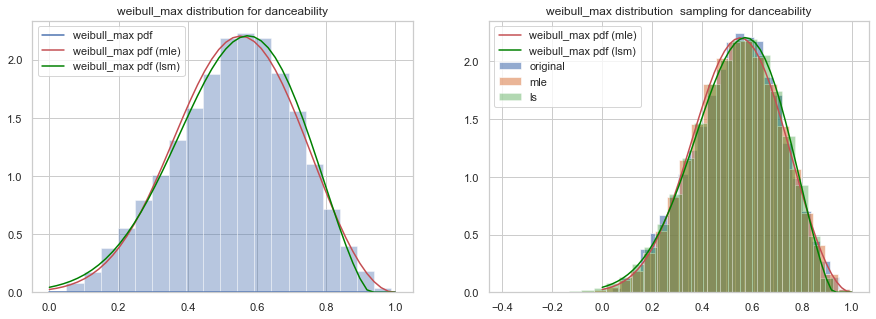

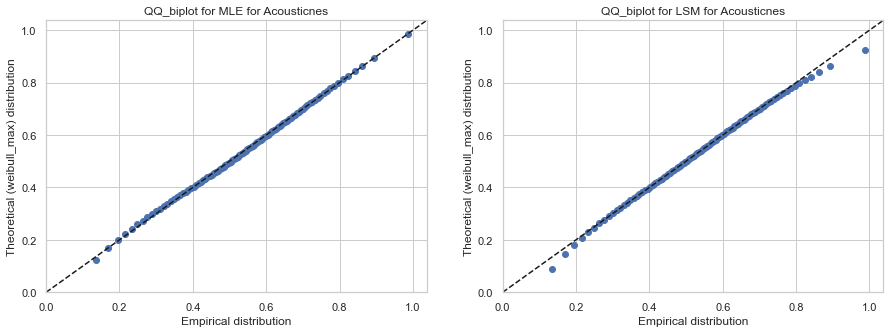

Kolmogorov test passed. Under the null hypothesis,
 the two weibull_max distributions are identical
KstestResult(statistic=0.13875706394334086, pvalue=0.2653077584672522)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative weibull_max distribution is true
CramerVonMisesResult(statistic=0.10840555946305026, pvalue=0.5468979041002913)


Kolmogorov test passed. Under the null hypothesis,
 the two weibull_max distributions are identical
KstestResult(statistic=0.11346062013131075, pvalue=0.5044991425086887)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative weibull_max distribution is true
CramerVonMisesResult(statistic=0.07567588555517854, pvalue=0.7194286893155308)




In [37]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
c = 2.5
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),c), label='weibull_max pdf', color = 'b')
parameters_mle, parameters_lsm = parameters(df['danceability'], weibull_max, func_weibull_max, 0.1,0.9)
# # parameters_mle = weibull_max.fit(df['danceability'])
# print (parameters_lsm, parameters_mle)
# # parameters_lsm = l_s_m(func_weibull_max, df['danceability'])
axs[0].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='weibull_max pdf (mle)')
axs[0].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='weibull_max pdf (lsm)')
axs[0].set_title('weibull_max distribution for danceability')
axs[0].legend(loc='best')
axs[1].hist(df[['danceability']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(weibull_max,parameters_mle, df['danceability'].shape[0])
sample_ls = sample_dist(weibull_max,parameters_lsm, df['danceability'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='weibull_max pdf (mle)')
axs[1].plot(np.linspace(0, 1), weibull_max.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='weibull_max pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_title('weibull_max distribution  sampling for danceability')
plt.show()

qq_biplots(*qns(df[['danceability']], weibull_max, parameters_mle, parameters_lsm), 'weibull_max', 'Acousticnes')
statistical_tests(df['danceability'], 'weibull_max', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['danceability'], 'weibull_max', parameters_lsm, alpha = 0.05, N = 50)

#### Exponpow distribution for Danceability

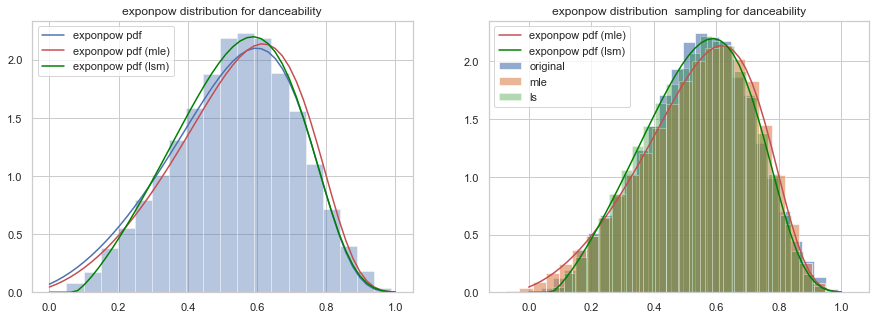

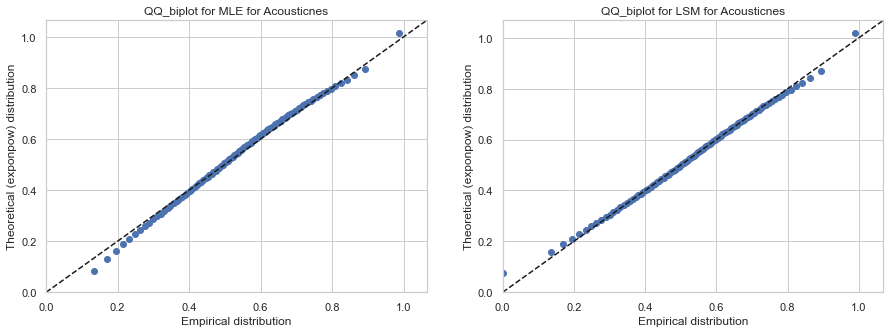

Kolmogorov test passed. Under the null hypothesis,
 the two exponpow distributions are identical
KstestResult(statistic=0.12267578714171373, pvalue=0.4064675214850153)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative exponpow distribution is true
CramerVonMisesResult(statistic=0.190162419331188, pvalue=0.28791393462503734)


Kolmogorov test passed. Under the null hypothesis,
 the two exponpow distributions are identical
KstestResult(statistic=0.11771016237565401, pvalue=0.45791829741961354)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative exponpow distribution is true
CramerVonMisesResult(statistic=0.10066941579324547, pvalue=0.5834151788076446)




In [38]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
b=2.9
sns.distplot(df[['danceability']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1), b, loc=-0.1, scale=0.8), label='exponpow pdf', color = 'b')
# parameters_mle, parameters_lsm = parameters(df['danceability'], burr12, func_burr12)
parameters_mle = exponpow.fit(df['danceability'], fscale=0.8)
parameters_lsm = l_s_m(func_exponpow, df['danceability'], 0.1,0.9)
axs[0].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='exponpow pdf (mle)')
axs[0].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='exponpow pdf (lsm)')
axs[0].set_title('exponpow distribution for danceability')
axs[0].legend(loc='best')
axs[1].hist(df[['danceability']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(exponpow,parameters_mle, df['danceability'].shape[0])
sample_ls = sample_dist(exponpow,parameters_lsm, df['danceability'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='exponpow pdf (mle)')
axs[1].plot(np.linspace(0, 1), exponpow.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='exponpow pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_title('exponpow distribution  sampling for danceability')
# plt.show()
plt.savefig(fname='Danceability.png', format='png', transparent=False, dpi=300)
qq_biplots(*qns(df[['danceability']], exponpow, parameters_mle, parameters_lsm), 'exponpow', 'Acousticnes')
statistical_tests(df['danceability'], 'exponpow', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['danceability'], 'exponpow', parameters_lsm, alpha = 0.05, N = 50)

### Popularity

1. The data are skewed a little
2. The data are positive-valued
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **skewnorm, rice**.

In [39]:
df['popularity']=df['popularity'].astype('float')

#### Rice distribution for Popularity

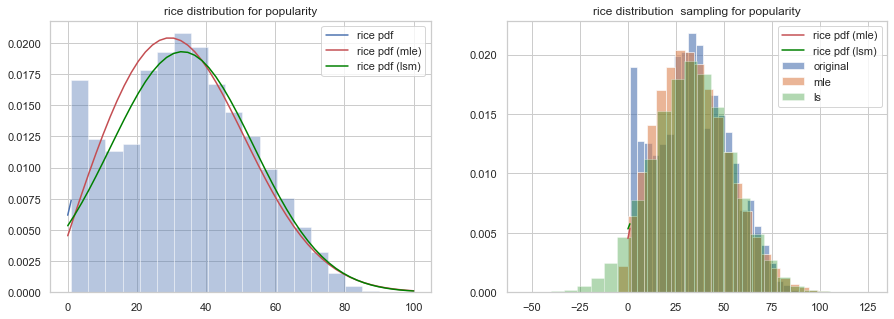

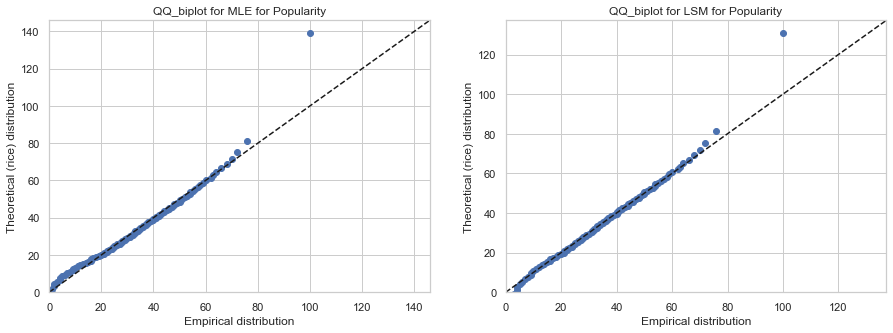

Kolmogorov test passed. Under the null hypothesis,
 the two rice distributions are identical
KstestResult(statistic=0.08524185023428428, pvalue=0.8304629899507624)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative rice distribution is true
CramerVonMisesResult(statistic=0.0788831816391566, pvalue=0.7004965840047417)


Kolmogorov test passed. Under the null hypothesis,
 the two rice distributions are identical
KstestResult(statistic=0.10800341510449146, pvalue=0.5671225884649935)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative rice distribution is true
CramerVonMisesResult(statistic=0.36941371785833976, pvalue=0.08682409366074917)




In [40]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
b=1
sns.distplot(df[['popularity']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), rice.pdf(np.linspace(0, 1), b, loc=-5, scale=22), label='rice pdf', color = 'b')
parameters_mle, parameters_lsm = parameters(df['popularity'], rice, func_rice, 0.1, 0.9)
axs[0].plot(np.linspace(0, 100), rice.pdf(np.linspace(0, 100),*parameters_mle), color = 'r',label='rice pdf (mle)')
axs[0].plot(np.linspace(0, 100), rice.pdf(np.linspace(0, 100),*parameters_lsm),color = 'green', label='rice pdf (lsm)')
axs[0].set_title('rice distribution for popularity')
axs[0].legend(loc='best')
axs[1].hist(df[['popularity']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(rice,parameters_mle, df['popularity'].shape[0])
sample_ls = sample_dist(rice,parameters_lsm, df['popularity'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), rice.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='rice pdf (mle)')
axs[1].plot(np.linspace(0, 1), rice.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='rice pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_title('rice distribution  sampling for popularity')
plt.show()
# plt.savefig(fname='popularity.png', format='png', trainparent=False)
qq_biplots(*qns(df[['popularity']], rice, parameters_mle, parameters_lsm), 'rice', 'Popularity')
statistical_tests(df['popularity'], 'rice', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['popularity'], 'rice', parameters_lsm, alpha = 0.05, N = 50)

#### Skewnorm distribution for Popularity

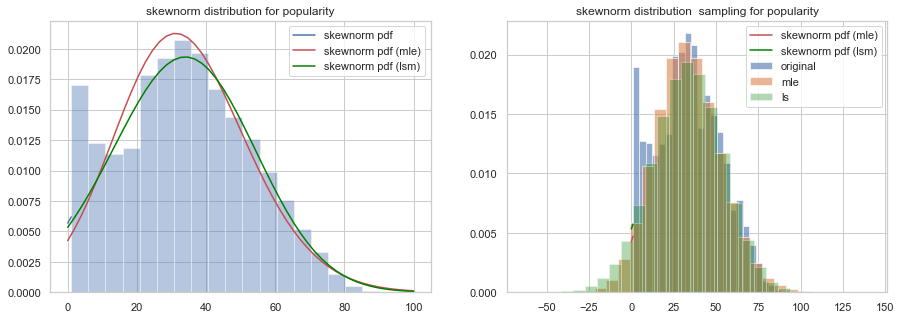

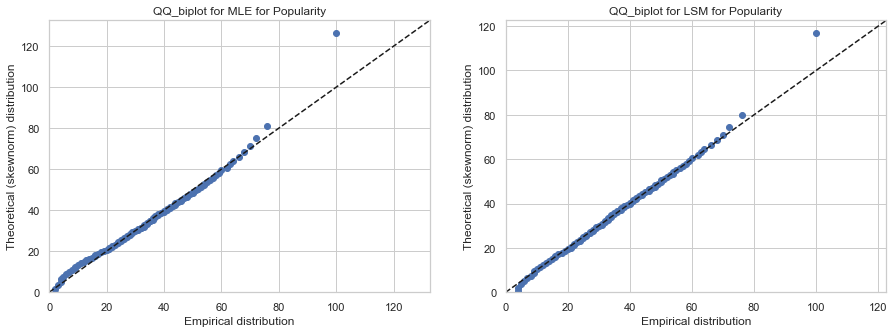

Kolmogorov test passed. Under the null hypothesis,
 the two skewnorm distributions are identical
KstestResult(statistic=0.08105397280914728, pvalue=0.8713173775351162)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative skewnorm distribution is true
CramerVonMisesResult(statistic=0.1069586623776674, pvalue=0.5535299950609861)


Kolmogorov test passed. Under the null hypothesis,
 the two skewnorm distributions are identical
KstestResult(statistic=0.11795194394544961, pvalue=0.455335318504294)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative skewnorm distribution is true
CramerVonMisesResult(statistic=0.11935100614938897, pvalue=0.4995610136370474)




In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs=axs.flat
b=1
sns.distplot(df[['popularity']],bins=20,kde=False,norm_hist=True, ax=axs[0])
axs[0].plot(np.linspace(0, 1), skewnorm.pdf(np.linspace(0, 1), b, loc=18, scale=24), label='skewnorm pdf', color = 'b')
parameters_mle, parameters_lsm = parameters(df['popularity'], skewnorm, func_skewnorm, 0.1,0.9)
axs[0].plot(np.linspace(0, 100), skewnorm.pdf(np.linspace(0, 100),*parameters_mle), color = 'r',label='skewnorm pdf (mle)')
axs[0].plot(np.linspace(0, 100), skewnorm.pdf(np.linspace(0, 100),*parameters_lsm),color = 'green', label='skewnorm pdf (lsm)')
axs[0].set_title('skewnorm distribution for popularity')
axs[0].legend(loc='best')
axs[1].hist(df[['popularity']], bins = 26, alpha = 0.6, density = True, label = 'original')
sample_mle = sample_dist(skewnorm,parameters_mle, df['popularity'].shape[0])
sample_ls = sample_dist(skewnorm,parameters_lsm, df['popularity'].shape[0])
axs[1].hist(sample_mle, bins = 26, alpha = 0.6, density = True, label = 'mle')
axs[1].hist(sample_ls, bins = 26, density = True, alpha = 0.3, label = 'ls', color = 'green')
axs[1].plot(np.linspace(0, 1), skewnorm.pdf(np.linspace(0, 1),*parameters_mle), color = 'r',label='skewnorm pdf (mle)')
axs[1].plot(np.linspace(0, 1), skewnorm.pdf(np.linspace(0, 1),*parameters_lsm),color = 'green', label='skewnorm pdf (lsm)')
axs[1].legend(loc='best')
axs[1].set_title('skewnorm distribution  sampling for popularity')
plt.show()
# plt.savefig(fname='popularity.png', format='png', trainparent=False)
qq_biplots(*qns(df[['popularity']], skewnorm, parameters_mle, parameters_lsm), 'skewnorm', 'Popularity')
statistical_tests(df['popularity'], 'skewnorm', parameters_mle, alpha = 0.05, N = 50)
statistical_tests(df['popularity'], 'skewnorm', parameters_lsm, alpha = 0.05, N = 50)